In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Conjunto de Datos

Tenemos un conjunto de datos observados que queremos representar por un modelo matemático.
Vamos a utilizar un modelo sencillo: una recta.

Los datos observados van a permanecer constantes sobre todo el análisis que vamos a realizar:

In [2]:
X     = np.array([0, 1, 2, 3, 4, 5])
Y_obs = np.array([8.0, 6.4, np.pi, np.pi/2., 0, -1.5])

Al graficarlos, los datos observados quedan:

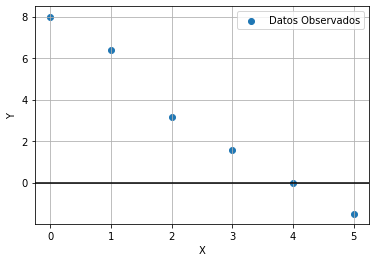

In [3]:
plt.scatter(X, Y_obs, label="Datos Observados")
plt.grid()
plt.axhline(y=0, c='k')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc=0)

# Modelo de Ajuste

Definimos el modelo matemático que queremos ajustar a los datos. Será nuestra función recta que depende de la variable $x$ y de dos parámetros a ajustar: $m$ y $b$

$$ Y_{fit} = m X + b $$

In [4]:
def recta(x, m, b):
    return m * x + b

Ya definido nuestro modelo lineal, vamos a probar qué tan bien se ajustan dos rectas, es decir, vamos a tomar dos puntos en el espacio de parámetros $m$ y $b$:
* $m_1=0$, $b_1=4$
* $m_2=-2$, $b_2 = 7$

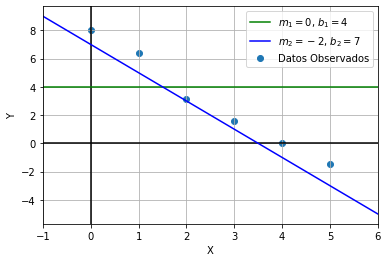

In [5]:
plt.grid()
plt.axhline(y=0, c='k')
plt.axvline(x=0, c='k')
plt.xlim(-1,6)
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(X, Y_obs, label="Datos Observados")


# Utilizamos un "x contínuo" para ver la forma de la función de ajuste
x_continuo = np.linspace(-1, 6, 30)
# Vamos con m=0 y b=4
y_fit = recta(x_continuo, 0, 4)
plt.plot(x_continuo, y_fit, c='g', label=r"$m_1=0$, $b_1=4$")
# Vamos con m=-2 y b=7
y_fit = recta(x_continuo, -2, 7)
plt.plot(x_continuo, y_fit, c='b', label=r"$m_2=-2$, $b_2 = 7$")
plt.legend(loc=0)

Mi sentido arácnido dice que eligiendo $b=7.8$ y $m=-2$ vamos a tener un mejor ajuste...

# Función de Costo

Vemos que el modelo lineal en azul ($m_2, b_2$) se acerca más a los datos observados que el modelo evaluado en los parámetros ($m_1, b_1$).

Vamos a cuantificar qué tan bien se ajusta cada modelo a los datos usando una $\textbf{Función de Costo}$ $\chi^2$ que tiene como argumentos $m$ y $b$. Esta función ya la deben haber visto en el método de mínimos cuadrados de física experimental.

$$ \chi^2(m,b) = \sum_{i=1}^N \frac{\left( Y_{obs, i} - Y_{fit, i}\right)^2}{2\sigma^2} $$

Podemos reescribir $Y_{fit}$ si queremos, para dejar esto más explícito en términos de nuestro modelo lineal.

$$ \chi^2(m,b) = \sum_{i=1}^N \frac{\left( Y_{obs, i} - (m X_i + b) \right)^2}{2\sigma^2} $$


¡Ojo! Los datos observados no van a variar durante todo el tratamiento. Vamos a variar los parámetros de ajuste $m$ y $b$.

In [6]:
def Chi2(m, b):
    Y_fit = recta(X, m, b)
    chi2 = 0
    sigma = 1
    for i in range(len(X)):
        chi2 += ( Y_obs[i] - Y_fit[i])**2 / (2.0 * sigma)
    return chi2

Con nuestro primer conjunto de parámetros $p_1$ en color verde:
* $m_1=0$, $b_1=4$ 

In [7]:
Chi2(0, 4)

37.32394682914209

Y con el segundo conjunto $p_2$, en color azul
* $m_2=-2$, $b_2 = 7$

In [8]:
Chi2(-2, 7)

3.2779284631165733

Vemos cómo se reduce drásticamente el valor de $\chi^2$ al pasar del punto de parámetros $p_1$ a $p_2$

# Intermedio de gráficas bonitas

Veamos cómo depende $\chi^2(m,b)$ de sus argumentos.  Hagamos un bonito gráfico en tres dimensiones.

In [9]:
recta = np.vectorize(recta)
Chi2 = np.vectorize(Chi2)

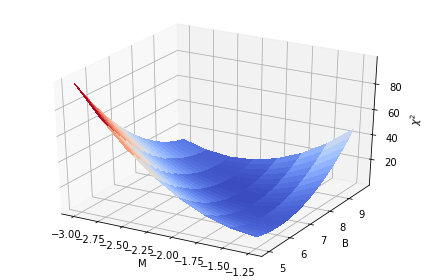

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
M = np.arange(-3, -1, 0.25)
B = np.arange(5, 10, 0.25)
M, B = np.meshgrid(M, B)
Z = Chi2(M, B)

surf = ax.plot_surface(M, B, Z, cmap=cm.coolwarm ,linewidth=0, antialiased=False)
ax.set_xlabel("M")
ax.set_ylabel("B")
ax.set_zlabel(r"$\chi^2$")
plt.tight_layout()

Con algo de imaginación, tiene forma de un paraboloide (crece más rápido en M que en B). Se puede jugar con los intervalos de B y M para graficar, también el ángulo de visualización. Y si, mi sentido arácnido dice que el mínimo está cerca de $m=-2$, $b=-7.8$

# De la Función de Error al método Monte Carlo de Metrópolis Hastings

En la clase anterior habíamos visto que podíamos generar un conjunto de números aleatorios que siguiera una distribución de probabilidad $\pi(x)$. En el algoritmo de Metropolis-Hastings llegábamos a hacer una comparación $\alpha$ para decidir si aceptábamos o no dar el paso de $x_0$ a $x_n$.

$$ \alpha = \frac{ \pi(x_n) }{ \pi(x_o)}$$

Ahora vamos a pasar de una a dos dimensiones. $x \rightarrow p = (m,b)$

Si generábamos $x_n = x_o \Delta r(-1,1)$ usando un número aleatorio $r$ entre $(-1,1)$, pues vamos a generar $p_n$ de modo similar:

$$ p_n = (m_n, p_n) $$

con:
$m_n = m_o \Delta r(-1,1)$
$b_n = b_o \Delta r(-1,1)$

Y para convertir nuestro $\chi^2$ en algo similar a una distribución de probabilidad, usamos una función exponencial, nos queda:

$$ \alpha = \frac{e^{-\chi^2(p_n)}}{e^{-\chi^2(p_o)}} = \frac{e^{-\chi^2(m_n, b_n)}}{e^{-\chi^2(m_o, b_o)}}$$


$$ \alpha = \frac{\exp(-\chi^2(m_n, b_n))}{\exp(-\chi^2(m_o, b_o))}$$


In [11]:
m_o = 0
b_o = 4

N = 5000       # Número de pasos
Delta = 0.1 # Ancho del paso
mcmc_steps = []

for i in range(N):
    P_o = np.exp( -Chi2(m_o, b_o) )
    
    m_n = m_o + Delta * np.random.uniform(-1,1)
    b_n = b_o + Delta * np.random.uniform(-1,1)
    
    P_n = np.exp( -Chi2(m_n, b_n) )
    
    alpha = P_n / P_o
    if(alpha >= 1): # Aceptamos de inmediato el paso
        mcmc_steps.append([m_n, b_n])
        m_o = m_n
        b_o = b_n
    else:
        beta = np.random.rand()
        if(alpha >= beta): # Aceptamos el paso
            mcmc_steps.append([m_n, b_n])
            m_o = m_n
            b_o = b_n
        else: # Rechazamos el paso :(
            mcmc_steps.append([m_o, b_o])
            # m_o y b_o siguen siendo iguales que al principio.
mcmc_steps = np.array(mcmc_steps)

In [12]:
m = mcmc_steps[:,0]
b = mcmc_steps[:,1]

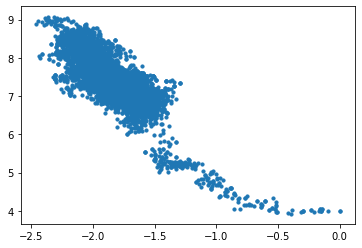

In [13]:
plt.scatter(m, b, s=10, alpha=1)

Text(0, 0.5, 'm')

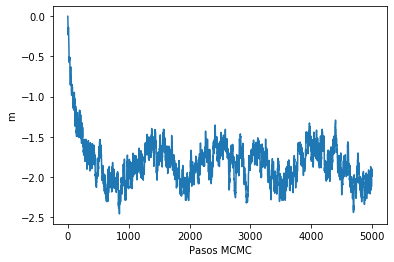

In [14]:
plt.plot(m)
plt.xlabel("Pasos MCMC")
plt.ylabel("m")


Text(0, 0.5, 'b')

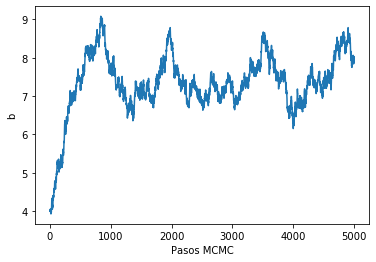

In [15]:
plt.plot(b)
plt.xlabel("Pasos MCMC")
plt.ylabel("b")


Con 5.000 pasos Monte Carlo podemos ver cómo el caminante aleatorio explora desde el punto de parámetros iniciales (m=0, b=4), y hacia los 3.000 pasos ha llegado a la región donde se tiene una distribución estacionaria; al aumentar el número de pasos el caminante va a recorrer esta región donde es más probable tener los parámetros de mejor ajuste, sin salir de la región.

Veamos cómo va con 15.000 pasos.

Text(0, 0.5, 'b')

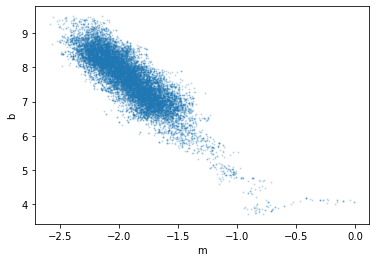

In [16]:
m_o = 0
b_o = 4

N = 15000       # Número de pasos
Delta = 0.1 # Ancho del paso
mcmc_steps = []

for i in range(N):
    P_o = np.exp( -Chi2(m_o, b_o) )
    
    m_n = m_o + Delta * np.random.uniform(-1,1)
    b_n = b_o + Delta * np.random.uniform(-1,1)
    
    P_n = np.exp( -Chi2(m_n, b_n) )
    
    alpha = P_n / P_o
    if(alpha >= 1): # Aceptamos de inmediato el paso
        mcmc_steps.append([m_n, b_n])
        m_o = m_n
        b_o = b_n
    else:
        beta = np.random.rand()
        if(alpha >= beta): # Aceptamos el paso
            mcmc_steps.append([m_n, b_n])
            m_o = m_n
            b_o = b_n
        else: # Rechazamos el paso :(
            mcmc_steps.append([m_o, b_o])
            # m_o y b_o siguen siendo iguales que al principio.
mcmc_steps = np.array(mcmc_steps)


m = mcmc_steps[:,0]
b = mcmc_steps[:,1]

fig = plt.figure()
plt.scatter(m, b, s=1, alpha=0.2)
plt.xlabel('m')
plt.ylabel('b')


Text(0, 0.5, 'm')

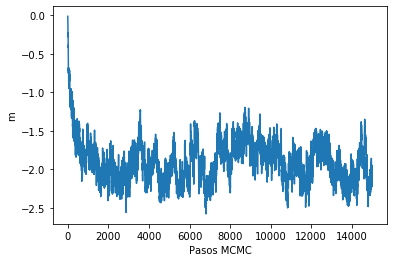

In [17]:
plt.plot(m)
plt.xlabel("Pasos MCMC")
plt.ylabel("m")

Text(0, 0.5, 'b')

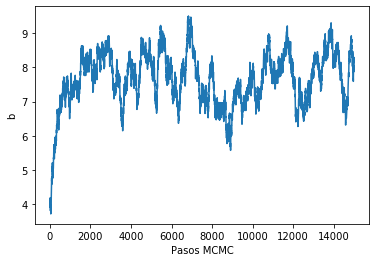

In [18]:
plt.plot(b)
plt.xlabel("Pasos MCMC")
plt.ylabel("b")

Ahora hagamos un muestreo con 100.000 pasos MCMC, descartando los 3.000 pasos iniciales mientras el método está "calentando". 

Revisen este enlace acerca de estos primeros pasos descartables.
http://users.stat.umn.edu/~geyer/mcmc/burn.html

In [19]:
m_o = 0
b_o = 4

burn_in_steps = 3000
N = 100000       # Número de pasos
Delta = 0.1 # Ancho del paso
mcmc_steps = []

for i in range(N + burn_in_steps):
    P_o = np.exp( -Chi2(m_o, b_o) )
    
    m_n = m_o + Delta * np.random.uniform(-1,1)
    b_n = b_o + Delta * np.random.uniform(-1,1)
    
    P_n = np.exp( -Chi2(m_n, b_n) )
    
    alpha = P_n / P_o
    beta = np.random.rand()
    if( np.minimum(alpha, 1) >= beta): 
        m_o = m_n
        b_o = b_n
    
    if (i >= burn_in_steps):       # Guardemos los pasos DESPUÉS del calentamiento.
        mcmc_steps.append([m_o, b_o])

mcmc_steps = np.array(mcmc_steps)

m = mcmc_steps[:,0]
b = mcmc_steps[:,1]

Ahora que tenemos una muestra bastante grande, podemos decir cuál es el valor de los parámetros óptimos con una incertidumbre asociada:

Text(0, 0.5, 'frecuencia')

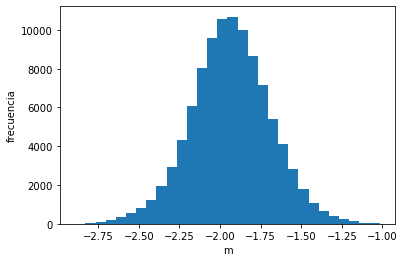

In [20]:
_ = plt.hist(m, 30, density=False)
plt.xlabel('m')
plt.ylabel('frecuencia')

Text(0, 0.5, 'frecuencia')

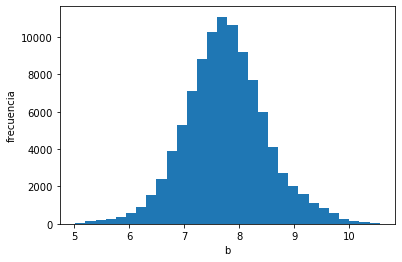

In [21]:
_ = plt.hist(b, 30, density=False)
plt.xlabel('b')
plt.ylabel('frecuencia')

Las distribuciones encontradas se pueden mostrar típicamente dentro de un "corner plot" como:

Text(0, 0.5, 'Densidad de Probabilidad')

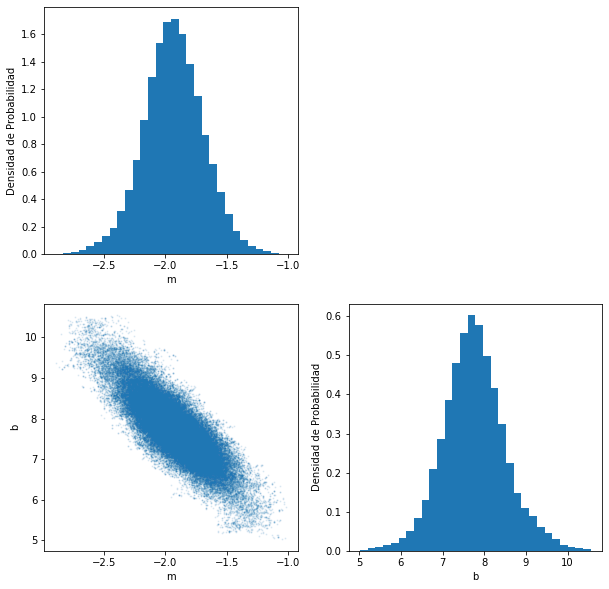

In [22]:
fig = plt.figure( figsize=(10,10))

ax1 = fig.add_subplot(2,2,1)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

_ = ax1.hist(m, 30, density=True)
ax1.set_xlabel('m')
ax1.set_ylabel('Densidad de Probabilidad')

ax3.scatter(m, b, s=1, alpha=0.1)
ax3.set_xlabel('m')
ax3.set_ylabel('b')

_ = ax4.hist(b, 30, density=True)
ax4.set_xlabel('b')
ax4.set_ylabel('Densidad de Probabilidad')

In [23]:
m_mean  = np.percentile(m, 50)
b_mean  = np.percentile(b, 50)

m_plus  = np.percentile(m, 75) -  m_mean
m_minus = m_mean -np.percentile(m, 25)

b_plus  = np.percentile(b, 75) -  b_mean
b_minus = b_mean -np.percentile(b, 25)

In [24]:
print( "m = {:.2f} (+ {:.2f}, -{:.2f})".format(m_mean, m_plus, m_minus))
print( "b = {:.2f} (+ {:.2f}, -{:.2f})".format(b_mean, b_plus, b_minus))

m = -1.94 (+ 0.16, -0.16)
b = 7.74 (+ 0.47, -0.45)


Finalmente, graficamos cómo queda nuestro ajuste con MCMC

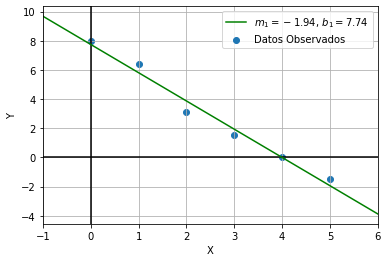

In [27]:
plt.grid()
plt.axhline(y=0, c='k')
plt.axvline(x=0, c='k')
plt.xlim(-1,6)
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(X, Y_obs, label="Datos Observados")


# Utilizamos un "x contínuo" para ver la forma de la función de ajuste
x_continuo = np.linspace(-1, 6, 30)
# Vamos con m=0 y b=4
y_fit = recta(x_continuo, m_mean, b_mean)
plt.plot(x_continuo, y_fit, c='g', label=r"$m_1= {:.2f}$, $b_1={:.2f}$".format(m_mean, b_mean))

plt.legend(loc=0)